# Dataset Exploration

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('/kaggle/input/american_bankruptcy.csv')
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


Instead of treating features as anonymous variables (X1, X2, …),I mapped them to meaningful financial indicators such as profitability, liquidity, leverage, and operational metrics. This allows the model’s behavior to be interpreted easily in financial terms.


In [3]:
df.rename(columns={
    'X1':'current_assets',
    'X2':'cost_of_goods_sold',
    'X3':'depreciation_amortization',
    'X4':'ebitda',
    'X5':'inventory',
    'X6':'net_income',
    'X7':'total_receivables',
    'X8':'market_value',
    'X9':'net_sales',
    'X10':'total_assets',
    'X11':'long_term_debt',
    'X12':'ebit',
    'X13':'gross_profit',
    'X14':'current_liabilities',
    'X15':'retained_earnings',
    'X16':'total_revenue',
    'X17':'total_liabilities',
    'X18':'total_operating_expenses'
}, inplace=True)


In [4]:
df.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   company_name               78682 non-null  object 
 1   status_label               78682 non-null  object 
 2   year                       78682 non-null  int64  
 3   current_assets             78682 non-null  float64
 4   cost_of_goods_sold         78682 non-null  float64
 5   depreciation_amortization  78682 non-null  float64
 6   ebitda                     78682 non-null  float64
 7   inventory                  78682 non-null  float64
 8   net_income                 78682 non-null  float64
 9   total_receivables          78682 non-null  float64
 10  market_value               78682 non-null  float64
 11  net_sales                  78682 non-null  float64
 12  total_assets               78682 non-null  float64
 13  long_term_debt             78682 non-null  flo

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,78682.0,2007.506317,5.742768,1999.0000,2002.00000,2007.00000,2012.00000,2018.00
current_assets,78682.0,880.362485,3928.564794,-7.7600,18.92400,100.44950,431.52675,169662.00
cost_of_goods_sold,78682.0,1594.529029,8930.484664,-366.6450,17.03825,103.66100,634.54800,374623.00
depreciation_amortization,78682.0,121.234256,652.376804,0.0000,1.19200,7.92950,47.97175,28430.00
ebitda,78682.0,376.759424,2012.023142,-21913.0000,-0.81100,15.03450,139.65525,81730.00
inventory,78682.0,201.605717,1060.766096,0.0000,0.00000,7.02300,74.74725,62567.00
net_income,78682.0,129.382453,1265.532022,-98696.0000,-7.41575,1.61600,40.14425,104821.00
total_receivables,78682.0,286.832743,1335.978571,-0.0060,3.28125,22.82000,131.58050,65812.00
market_value,78682.0,3414.354610,18414.103647,0.0001,34.98000,227.51185,1244.88995,1073390.54
net_sales,78682.0,2364.019706,11950.068842,-1964.9990,27.54850,186.59850,1046.40250,511729.00


In [7]:
df.isnull().sum()

company_name                 0
status_label                 0
year                         0
current_assets               0
cost_of_goods_sold           0
depreciation_amortization    0
ebitda                       0
inventory                    0
net_income                   0
total_receivables            0
market_value                 0
net_sales                    0
total_assets                 0
long_term_debt               0
ebit                         0
gross_profit                 0
current_liabilities          0
retained_earnings            0
total_revenue                0
total_liabilities            0
total_operating_expenses     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['status_label'].unique()

array(['alive', 'failed'], dtype=object)

In [10]:
df_numeric = df.copy()
df_numeric.drop(columns=['company_name'], inplace= True)

In [11]:
 def binaryclass( row ) :
     if row['status_label'] == 'alive' :
        return 1
     else:
        return 0

df_numeric['status_label']=df.apply(binaryclass,axis=1)
df_numeric.head()

,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,market_value,net_sales,total_assets,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,372.7519,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,1,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,377.1180,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,1,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,364.5928,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,1,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,143.3295,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,1,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,308.9071,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


# EDA

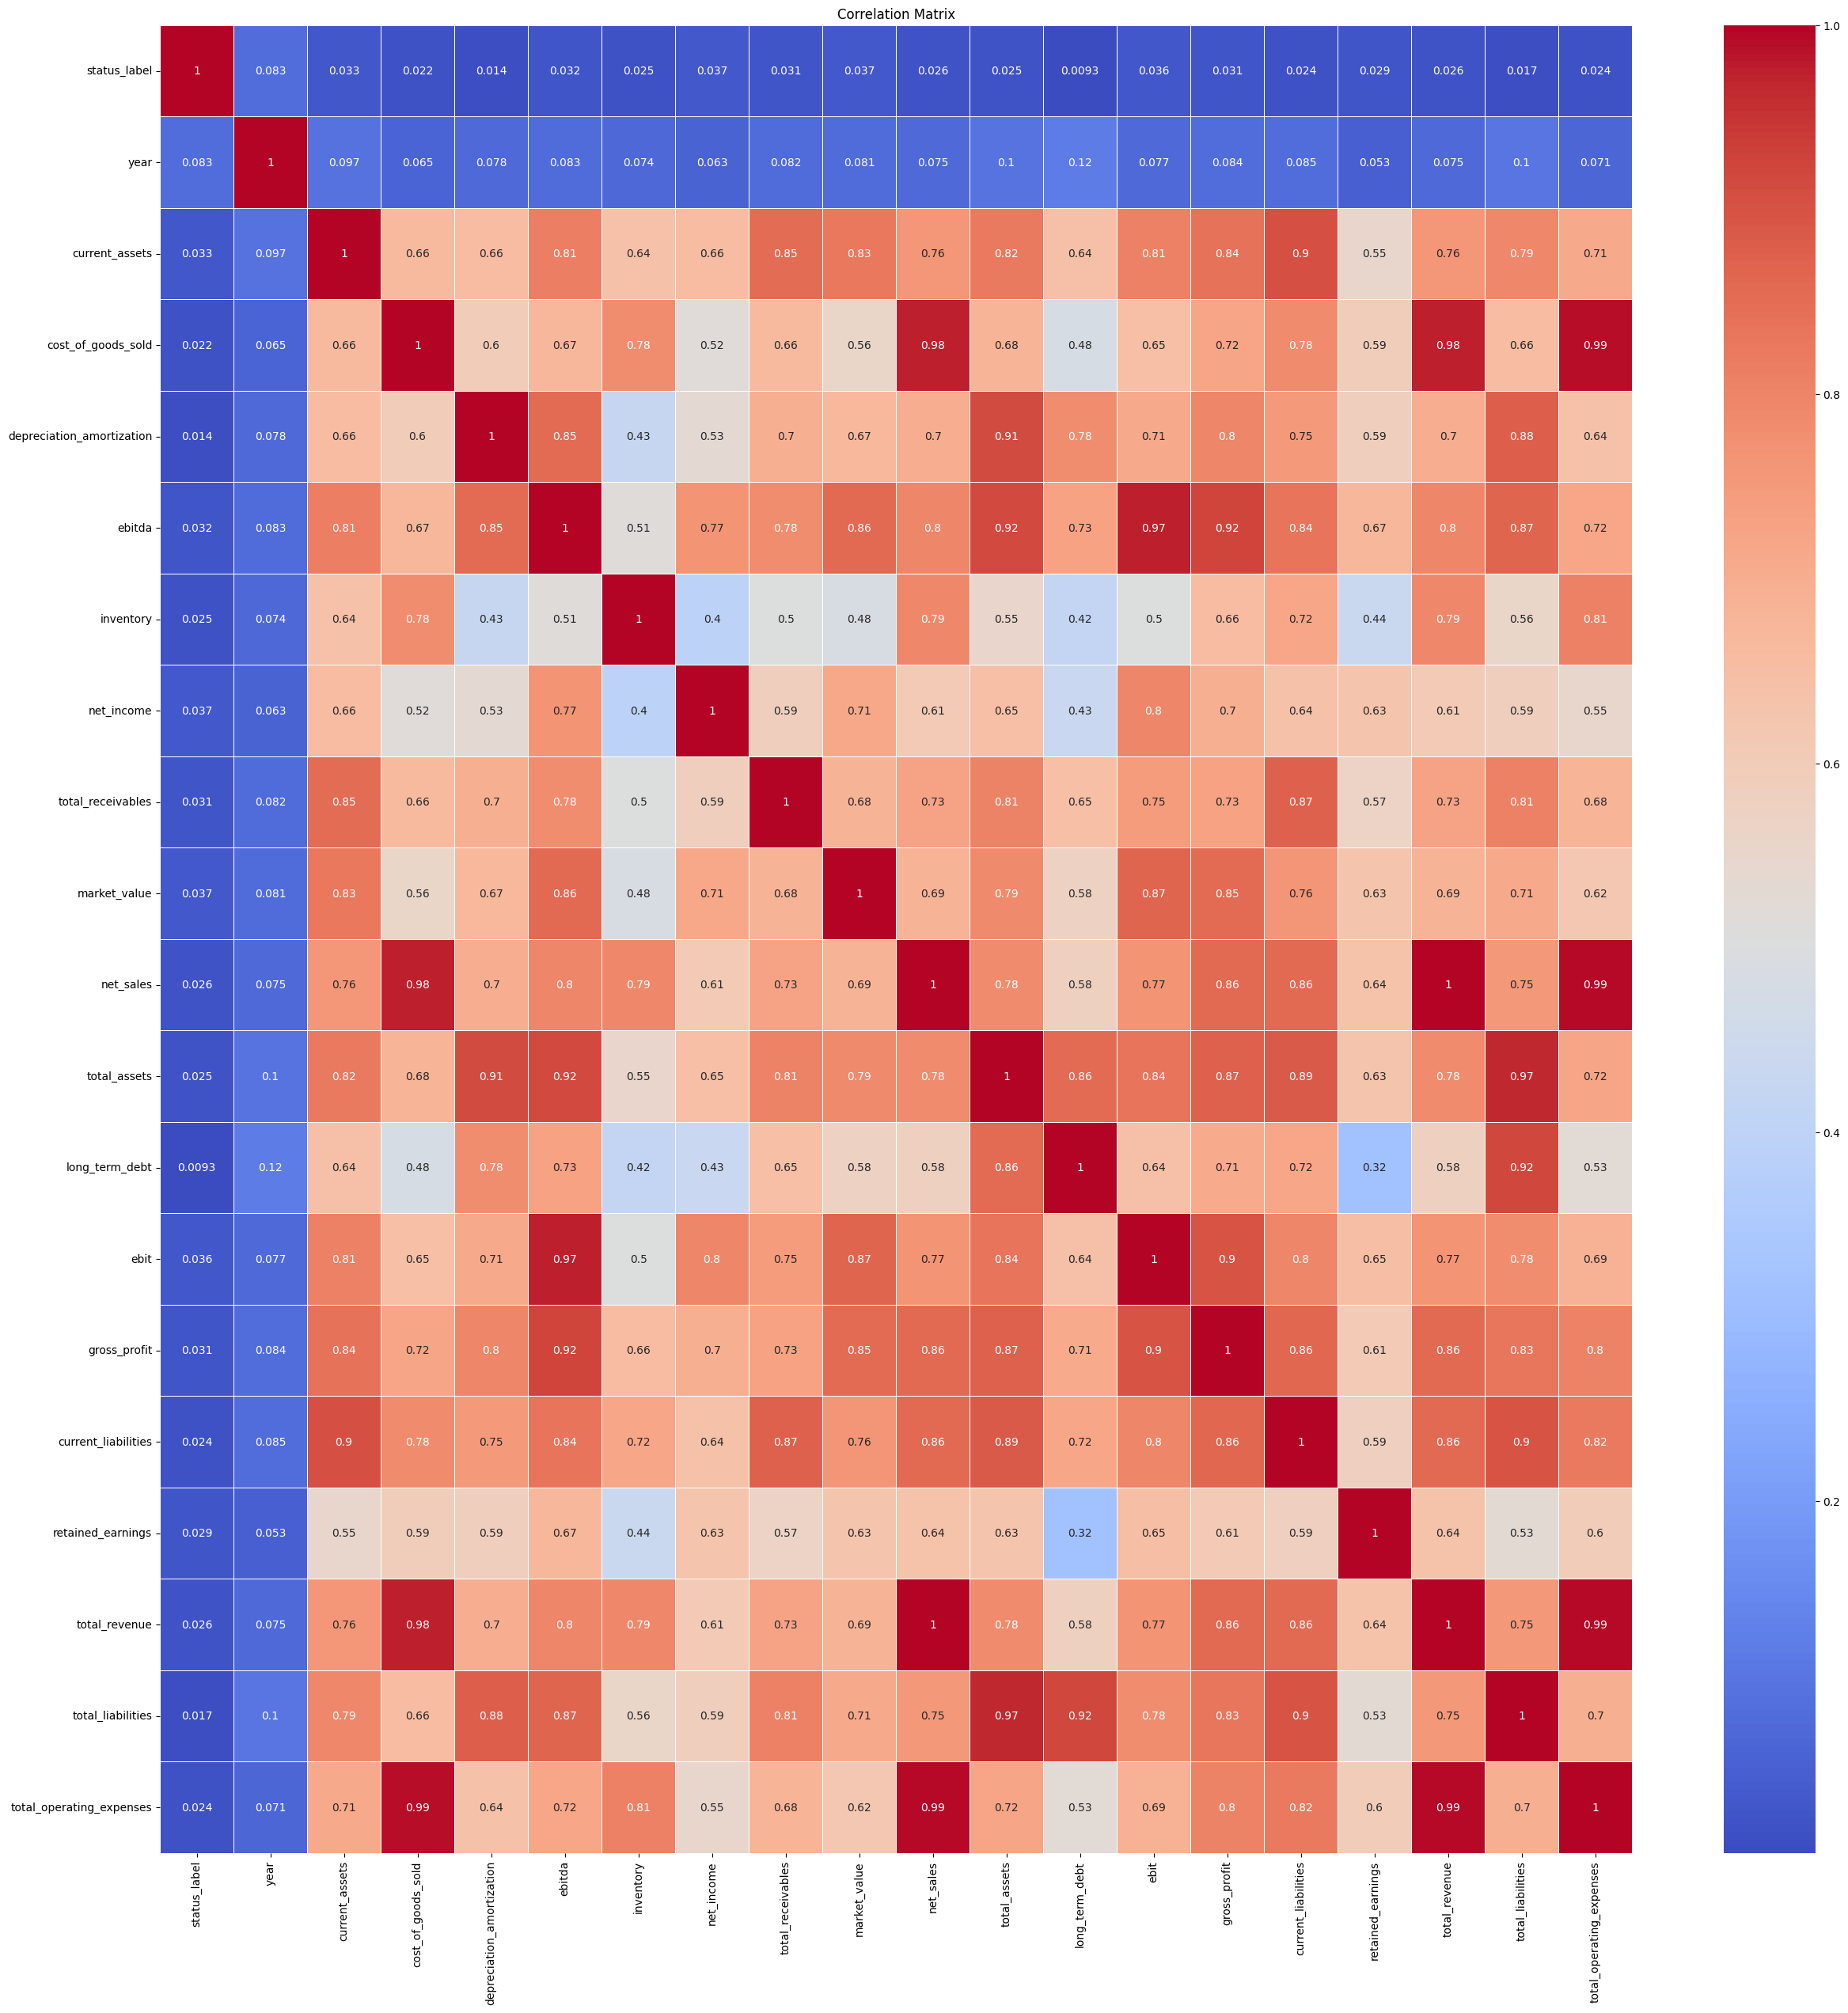

In [12]:
plt.figure(figsize=(30,30))
corr = df_numeric.corr()

sns.heatmap(
    corr,
    xticklabels = corr.columns,
    yticklabels = corr.columns,
    cmap = 'coolwarm',       
    annot = True,
    linewidth = 0.5
)

plt.title("Correlation Matrix")

plt.show()
# cmap : colourmap

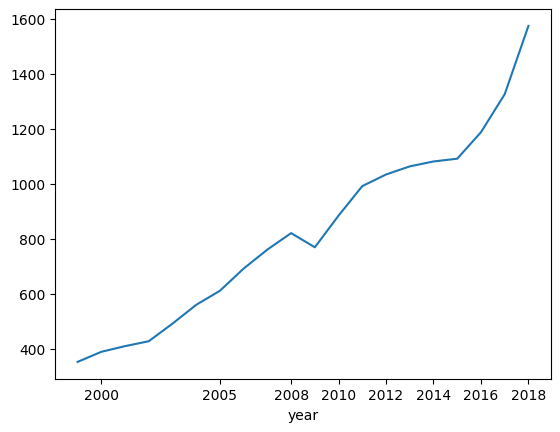

In [13]:
xtick_positions = [2000, 2005, 2008, 2010, 2012, 2014, 2016, 2018]
xtick_labels = [ '2010', '2012', '2014', '2016', '2018']
df_numeric.groupby(['year'])['gross_profit'].mean().plot()
plt.xticks(xtick_positions)

plt.show()


For every numeric feature, plot its yearly average gross-profit in its own small line plot(subplot).

In [14]:
df_means = df_numeric.groupby('year').mean()

n_features = len(df_means.columns)
n_rows = (n_features // 5) + 1
n_cols = min(5, n_features)
#creating grid structure

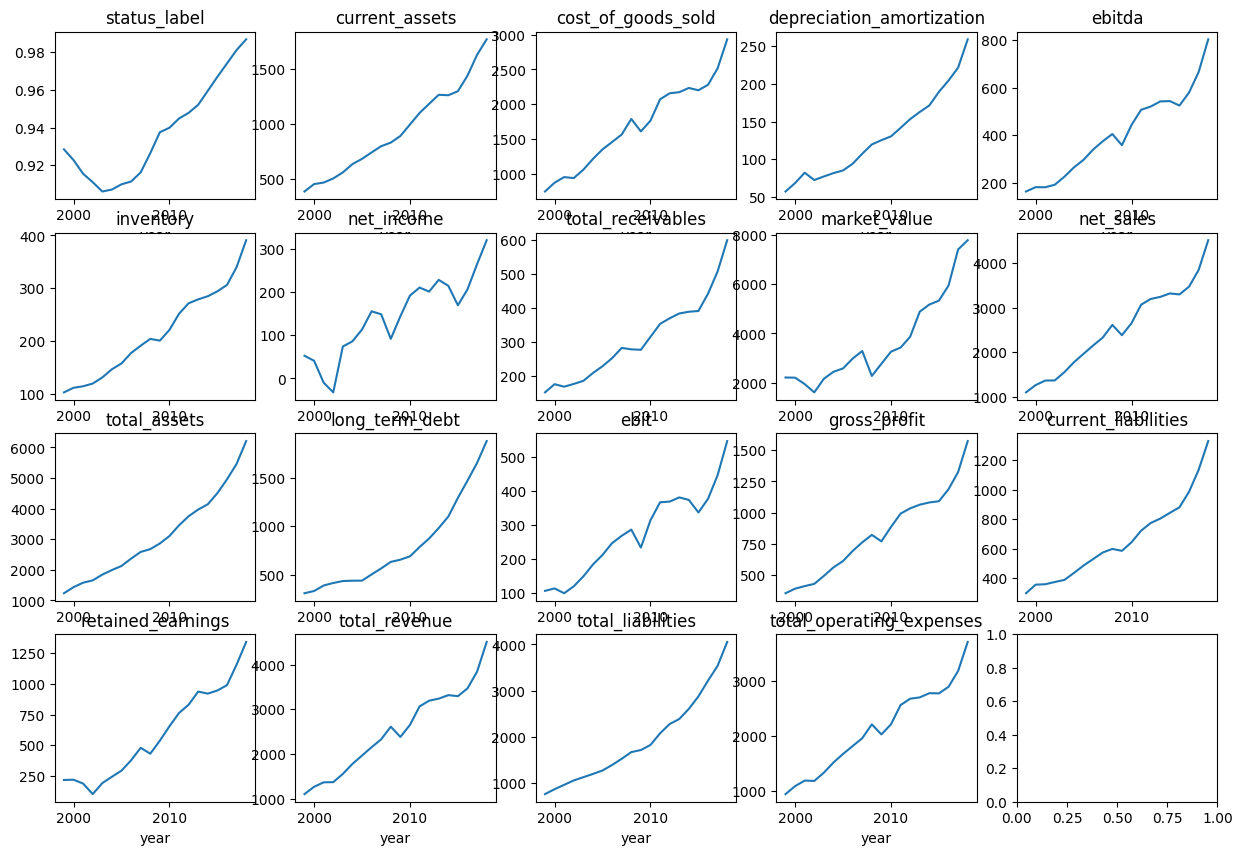

In [15]:
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15,10))

feature_index = 0;
for row in range (n_rows):
    for col in range (n_cols):
        if feature_index >= n_features:
            break
        feature_name = df_means.columns[feature_index]
        df_means[feature_name].plot(kind = 'line', ax= axes[row,col])
        axes[row, col].set_title(feature_name)
        feature_index +=1

plt.show()

### Observed Financial Trends

From the time-series plots of financial variables, a few important economic patterns can be observed:

- **Dot-com Bubble (2001–2002):**  
  During the early 2000s, several profitability-related indicators such as net income, EBITDA, and gross profit show slower growth or slight declines. This period corresponds to the collapse of the dot-com bubble, when many technology-focused firms failed and overall market confidence weakened.

- **Global Financial Crisis (2008–2009):**  
  A noticeable drop across most revenue and profit-related metrics appears in the year **2009**. Although the financial crisis intensified in 2008, its impact on businesses became more visible in 2009 due to delayed effects such as reduced consumer spending, tighter credit conditions, and lower investment activity.

- **Lagged Economic Impact:**  
  Financial shocks do not affect company performance instantly. Instead, their effects propagate over time, which explains why the strongest declines appear after the initial crisis year.

- **Key Takeaway:**  
  These trends suggest that the dataset reflects real-world macroeconomic cycles. Any predictive or analytical model built on this data should account for structural breaks and changing economic regimes over time.



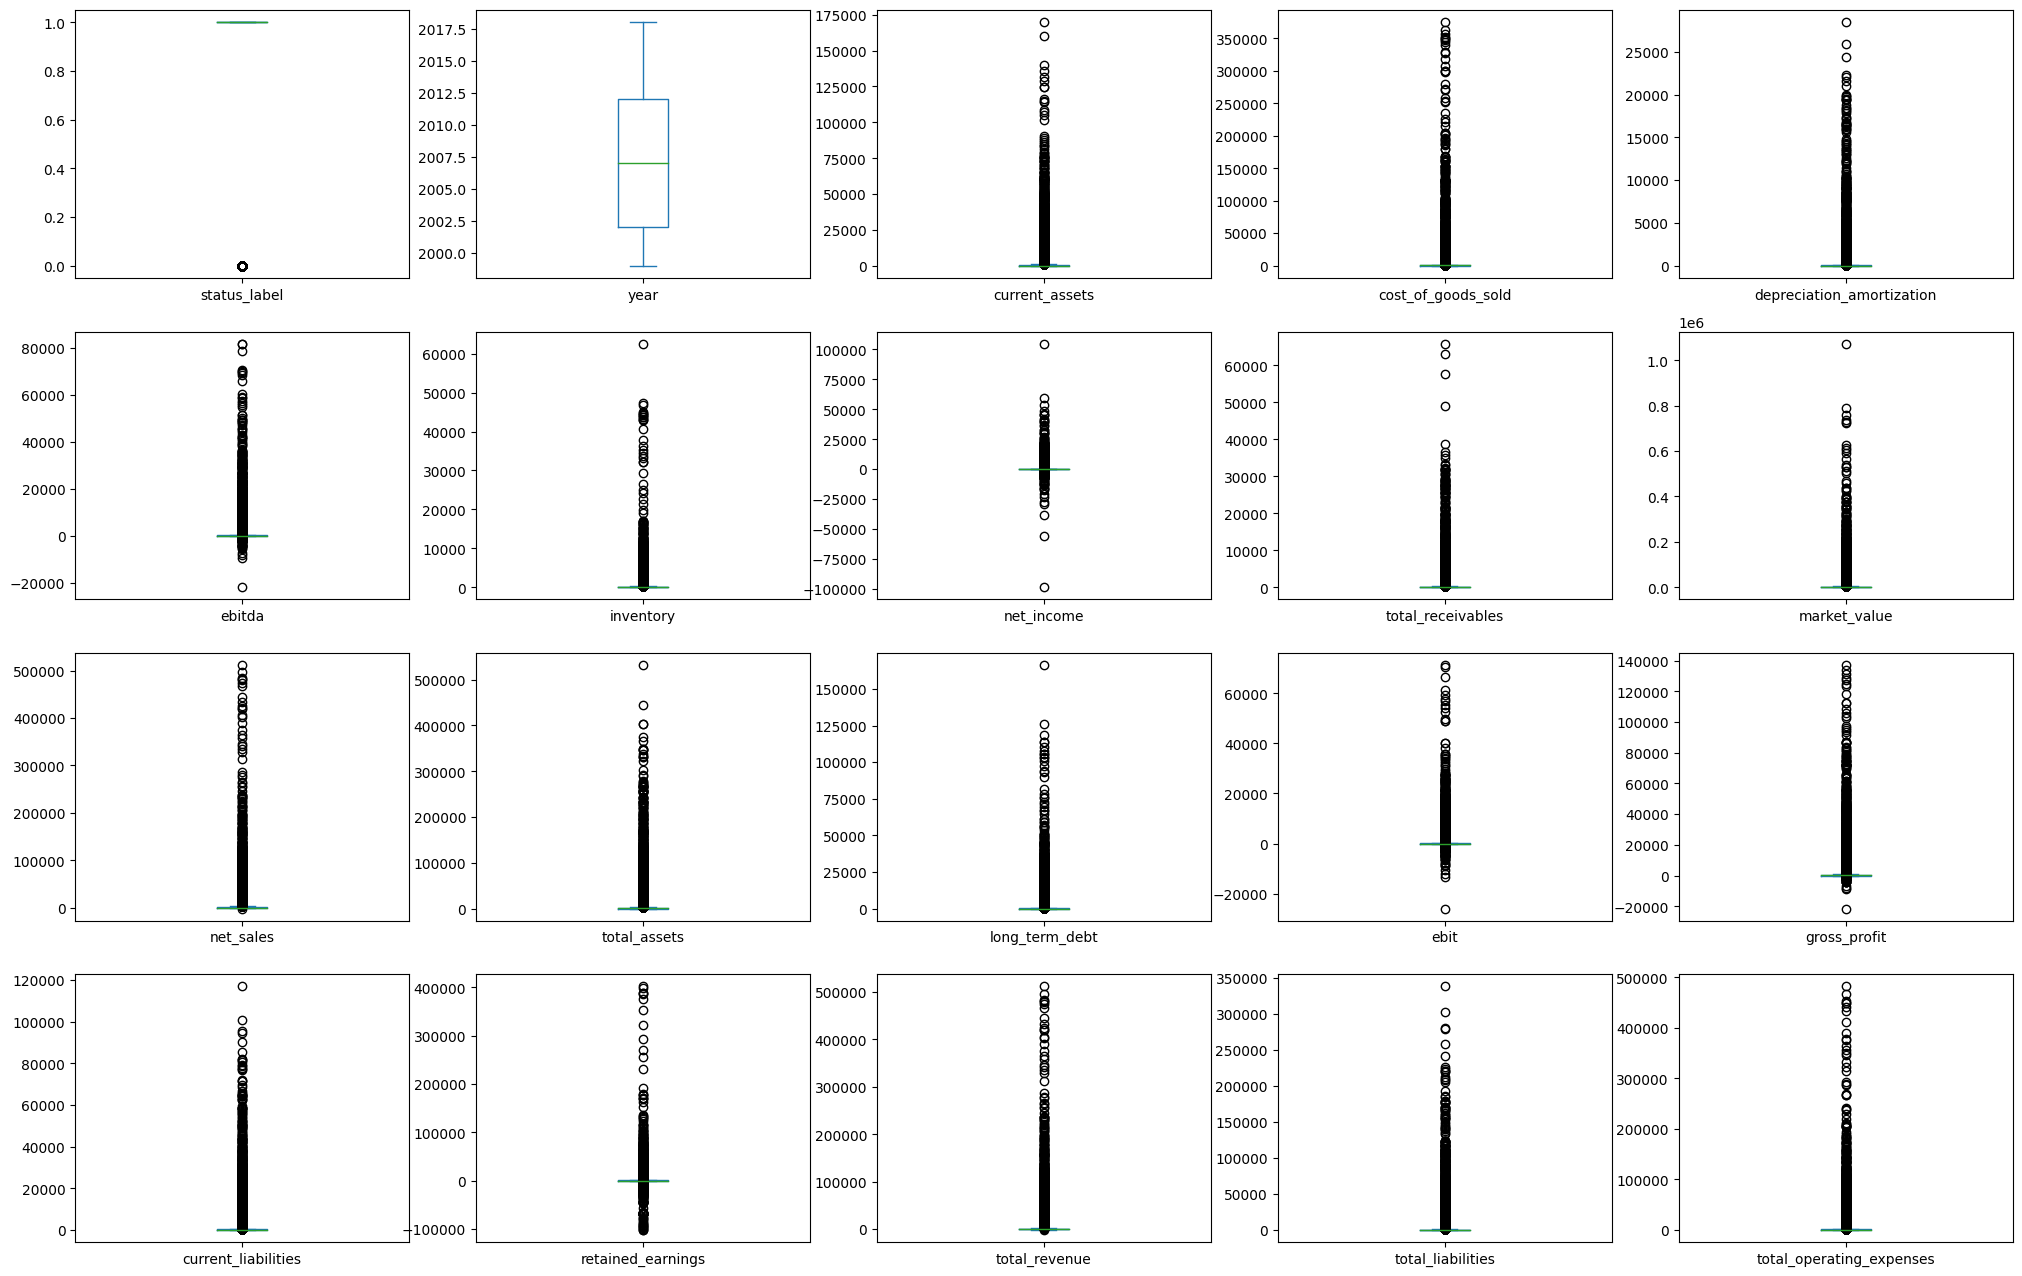

In [16]:
rows, cols = 4,5
df_numeric.plot(
    kind = "box" , 
    subplots = True , 
    layout = (rows, cols),
    figsize = (cols * 5, rows * 4)  
)
plt.show()

* We have a lot of outliers and scattered data.
* Outliers will not be removed, because when I did so, there were no bankrupt companies left in the database. So I preferred to keep all the data, considering that in the outliers there could be important information of 1 (bankruptcy).

# preprocessing

In [17]:
df['company_name'].value_counts().count()

8971

number of actual companies in our dataset

In [18]:
 df.status_label.value_counts()

status_label
alive     73462
failed     5220
Name: count, dtype: int64

In [19]:
df2=df.groupby('company_name').agg({'status_label': 'first'})

In [20]:
df2.status_label.value_counts()

status_label
alive     8362
failed     609
Name: count, dtype: int64

In [21]:
# Filter for failed companies (status_label=0)
failed_companies = df[df['status_label'] == 'failed']

# Remove duplicates for alive companies (status_label=1) based on company_name only
alive_companies = df[df['status_label'] == 'alive'].drop_duplicates(subset='company_name')

# Combine alive and unique failed companies
all_companies = pd.concat([alive_companies, failed_companies], ignore_index=True)

# Print the resulting DataFrame
all_companies.status_label.value_counts()

status_label
alive     8362
failed    5220
Name: count, dtype: int64

In [22]:
all_companies['status_label'] = all_companies.apply(binaryclass,axis=1)

In [23]:
all_companies.head()

,company_name,status_label,year,current_assets,cost_of_goods_sold,depreciation_amortization,ebitda,inventory,net_income,total_receivables,...,net_sales,total_assets,long_term_debt,ebit,gross_profit,current_liabilities,retained_earnings,total_revenue,total_liabilities,total_operating_expenses
0,C_1,1,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_2,1,1999,1029.438,930.142,102.090,413.739,243.882,87.635,436.751,...,1926.947,1672.529,11.024,311.649,996.805,412.954,827.489,1926.947,423.978,1513.208
2,C_3,1,1999,9.757,19.796,0.667,-0.265,5.494,-2.207,3.924,...,29.370,13.986,5.974,-0.932,9.574,2.804,-6.375,29.370,8.778,29.635
3,C_4,1,1999,381.872,366.683,25.633,123.160,161.033,36.972,189.261,...,732.443,1160.266,591.784,97.527,365.760,164.276,54.359,732.443,808.333,609.283
4,C_5,1,1999,28.957,79.567,2.024,3.873,10.947,-0.138,15.890,...,107.310,42.210,0.591,1.849,27.743,39.835,-33.199,107.310,52.453,103.437


<Axes: >

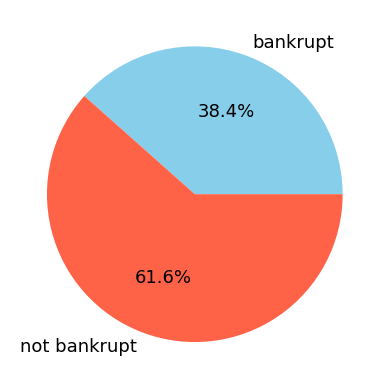

In [24]:
all_companies.groupby('status_label').size().plot(kind='pie',
    autopct='%.1f%%',
    fontsize=13,
    labels=['bankrupt','not bankrupt'],
    colors=['skyblue', 'tomato']
    )

In [25]:
all_companies.drop(columns=['company_name'],inplace=True)

In [26]:
has_negatives = all_companies.lt(0).any()

# has_negatives is a Series containing True/False for each column

# Print column names with negative values (optional)
if has_negatives.any():
  negative_cols = has_negatives[has_negatives].index.tolist()
  print("Columns with negative values:", negative_cols)

Columns with negative values: ['cost_of_goods_sold', 'ebitda', 'net_income', 'net_sales', 'ebit', 'gross_profit', 'retained_earnings', 'total_revenue', 'total_operating_expenses']


### I introduced standard financial ratios giving more meaningful financial signals, making the model easier to interpret and better aligned with real-world financial analysis.


Profitability Ratios:

* Net Profit Margin: (Net Income) / (Revenue) - Measures the percentage of revenue that is converted into profit.
* Return on Equity (ROE): (Net Income) / (Shareholder Equity) - Measures the return on investment for shareholders.
* Return on Assets (ROA): (Net Income) / (Total Assets) - Measures the efficiency of using assets to generate profit.
* Gross Profit Margin: (Gross Profit) / (Net Sales) - Measures the profit remaining after accounting for the cost of goods sold.
* Return on Sales (ROS): (Net Income) / (Net Sales) - Similar to Net Profit Margin, but expressed as a percentage.


Liquidity Ratios:

* Current Ratio: (Current Assets) / (Current Liabilities) - Measures a company's ability to pay off short-term liabilities with its current assets.
* Quick Ratio: (Current Assets - Inventory) / (Current Liabilities) - A more conservative measure of liquidity that excludes inventory from current assets.
* Cash Ratio: (Cash and Cash Equivalents) / (Current Liabilities) - The most stringent liquidity measure, indicating a company's ability to pay off short-term liabilities solely with cash.

Solvency Ratios:

* Debt-to-Equity Ratio: (Total Liabilities) / (Shareholder Equity) - Measures a company's financial leverage and its reliance on debt financing.
* Debt-to-Asset Ratio: (Total Liabilities) / (Total Assets) - Indicates the proportion of a company's assets financed by debt.

Activity Ratios:

* Inventory Turnover: (Cost of Goods Sold) / (Average Inventory) - Measures how efficiently a company is selling its inventory.
* Receivables Turnover: (Revenue) / (Average Accounts Receivable) - Measures how efficiently a company is collecting payments from customers.



In [27]:
all_companies.columns

Index(['status_label', 'year', 'current_assets', 'cost_of_goods_sold',
       'depreciation_amortization', 'ebitda', 'inventory', 'net_income',
       'total_receivables', 'market_value', 'net_sales', 'total_assets',
       'long_term_debt', 'ebit', 'gross_profit', 'current_liabilities',
       'retained_earnings', 'total_revenue', 'total_liabilities',
       'total_operating_expenses'],
      dtype='object')

In [28]:
all_companies['net_profit_margin'] = (
    all_companies['net_income'] / all_companies['total_revenue']
)

all_companies['gross_profit_margin'] = (
    all_companies['gross_profit'] / all_companies['net_sales']
)

all_companies['roa'] = (
    all_companies['net_income'] / all_companies['total_assets']
)

all_companies['ros'] = (
    all_companies['net_income'] / all_companies['net_sales']
)

all_companies['current_ratio'] = (
    all_companies['current_assets'] / all_companies['current_liabilities']
)

all_companies['quick_ratio'] = (
    (all_companies['current_assets'] - all_companies['inventory']) /
    all_companies['current_liabilities']
)

all_companies['debt_to_asset_ratio'] = (
    all_companies['total_liabilities'] / all_companies['total_assets']
)


In [29]:
all_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13582 entries, 0 to 13581
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status_label               13582 non-null  int64  
 1   year                       13582 non-null  int64  
 2   current_assets             13582 non-null  float64
 3   cost_of_goods_sold         13582 non-null  float64
 4   depreciation_amortization  13582 non-null  float64
 5   ebitda                     13582 non-null  float64
 6   inventory                  13582 non-null  float64
 7   net_income                 13582 non-null  float64
 8   total_receivables          13582 non-null  float64
 9   market_value               13582 non-null  float64
 10  net_sales                  13582 non-null  float64
 11  total_assets               13582 non-null  float64
 12  long_term_debt             13582 non-null  float64
 13  ebit                       13582 non-null  flo

In [30]:
all_companies.columns

Index(['status_label', 'year', 'current_assets', 'cost_of_goods_sold',
       'depreciation_amortization', 'ebitda', 'inventory', 'net_income',
       'total_receivables', 'market_value', 'net_sales', 'total_assets',
       'long_term_debt', 'ebit', 'gross_profit', 'current_liabilities',
       'retained_earnings', 'total_revenue', 'total_liabilities',
       'total_operating_expenses', 'net_profit_margin', 'gross_profit_margin',
       'roa', 'ros', 'current_ratio', 'quick_ratio', 'debt_to_asset_ratio'],
      dtype='object')

# Model Training and Results

In [31]:
x = all_companies.drop(["status_label"], axis =1).values
y = all_companies['status_label'].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state = 42)

In [32]:
from sklearn.linear_model import LogisticRegression  
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [33]:

scaler = StandardScaler().fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [34]:
# Logistic Regression

logreg = LogisticRegression(
    class_weight = 'balanced',
    random_state = 42,
    max_iter = 1000
)

logreg.fit(x_train_scaled, y_train)
y_pred = logreg.predict(x_test_scaled)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)


              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1307
           1       0.73      0.73      0.73      2089

    accuracy                           0.67      3396
   macro avg       0.65      0.65      0.65      3396
weighted avg       0.67      0.67      0.67      3396

Confusion Matrix:
 [[ 751  556]
 [ 573 1516]]


In [35]:
# XGBoost Classifier

xgb = XGBClassifier(
    random_state = 42,
    n_estimators = 500,
    learning_rate = 0.05,
    max_depth = 5,
    eval_metrics = 'logloss',
    n_jobs = -1
)

xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82      1307
           1       0.88      0.91      0.89      2089

    accuracy                           0.87      3396
   macro avg       0.86      0.85      0.86      3396
weighted avg       0.87      0.87      0.87      3396

Confusion Matrix:
 [[1047  260]
 [ 196 1893]]


- So the recall and F1-Score kept on increasing with increasing number of trees, but for around 2000 n_estimators it got stable. n_setimators = 500 is best choice.

In [36]:
# Random Forest Classifier

rf = RandomForestClassifier(
    n_estimators = 300,
    max_depth = 10,
    min_samples_leaf = 20,
    random_state = 42,
    n_jobs = -1,
    class_weight = 'balanced'
)

rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cm)

              precision    recall  f1-score   support

           0       0.76      0.85      0.80      1307
           1       0.90      0.83      0.86      2089

    accuracy                           0.84      3396
   macro avg       0.83      0.84      0.83      3396
weighted avg       0.84      0.84      0.84      3396

Confusion Matrix:
 [[1108  199]
 [ 357 1732]]


- Random Forest achieves higher recall
- But XGBoost offers a better trade-off

Although XGBoost achieved higher overall accuracy and precision, Random Forest reduced false negatives by 61 cases on the test set, corresponding to nearly 5% of failed companies. Given that missing failures is particularly costly in risk screening scenarios, Random Forest is more suitable as an early-warning model, while XGBoost provides a more conservative and precise alternative for decision-making.


In [37]:
from joblib import dump

dump(rf, "random_forest_model.joblib")


['random_forest_model.joblib']